In [5]:
import numpy as np
import pandas as pd
from sail.models.river.forest import AdaptiveRandomForestClassifier

#### Load Data


In [6]:
X = pd.read_csv("../../../datasets/agrawal.csv").head(5000)

y = X["class"]
X.drop("class", axis=1, inplace=True)

#### Model Definition


In [7]:
random_forest = AdaptiveRandomForestClassifier(n_models=10)

#### Train Test Split


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

#### Start Incremental Training


In [10]:
y_preds = []
y_true = []
batch_size = 100

for start in range(0, X_train.shape[0], batch_size):
    end = start + batch_size

    X = X_train.iloc[start:end]
    y = y_train.iloc[start:end]

    random_forest.partial_fit(X, y, classes=[0, 1])

#### Make Prediction on the Hold out set


In [11]:
y_preds = []
y_true = []
batch_size = 100

for start in range(0, X_test.shape[0], batch_size):
    end = start + batch_size

    X = X_test.iloc[start:end]
    y = y_test.iloc[start:end]

    preds = random_forest.predict(X)
    y_preds.extend(list(preds))
    y_true.extend(list(y))

#### Classification Report


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       992
           1       0.94      0.86      0.90       508

    accuracy                           0.93      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



#### Plot confusion matrix


<Axes: >

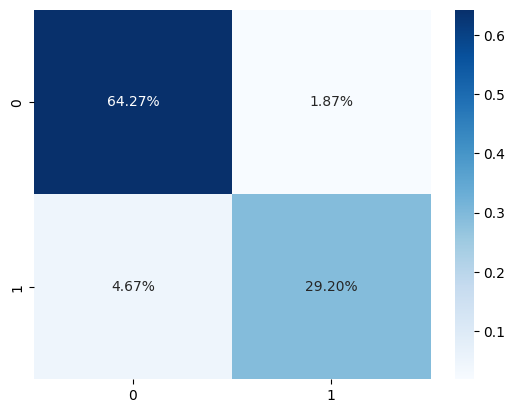

In [13]:
import seaborn as sns

cf_matrix = confusion_matrix(y_true, y_preds)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")